In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv('male_players.csv')

<ipython-input-2-c97419428717>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('male_players.csv')


In [3]:
players

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,https://sofifa.com/player/220806/ellis-redman/...,15.0,2.0,2014-09-18,E. Redman,Ellis Redman,CB,41,61,...,38,38,38,37,40,41,41,41,40,10
180017,225509,https://sofifa.com/player/225509/aaron-collins...,15.0,2.0,2014-09-18,A. Collins,Aaron Graham John Collins,ST,41,50,...,30,30,30,31,32,31,31,31,32,14
180018,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,15.0,2.0,2014-09-18,P. Żemło,Piotr Żemło,"LM, LB",40,50,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,https://sofifa.com/player/222947/tom-davies/15...,15.0,2.0,2014-09-18,T. Davies,Thomas Christopher Davies,CB,40,49,...,36,36,36,37,39,40,40,40,39,13


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data  = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,91,94,230000.0,181500000.0,24
1,91,94,340000.0,185000000.0,22
2,91,91,350000.0,103000000.0,32
3,90,90,23000.0,41000000.0,36
4,90,90,95000.0,51000000.0,35
...,...,...,...,...,...
180015,42,52,2000.0,20000.0,18
180016,41,61,2000.0,20000.0,17
180017,41,50,2000.0,30000.0,17
180018,40,50,2000.0,15000.0,18


1. Scale the data
2. Initialise random centroids
3. Label each data point
4. Update centroids
5. Repeat steps 3 and 4 until centroids stop changing

In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,177868.000000,177868.000000,177868.000000,177868.000000,177868.000000
mean,5.281100,5.809868,1.158887,1.110327,3.638844
std,1.171143,1.083434,0.339185,0.286905,1.349835
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.500000,4.980769,1.023499,1.015031,2.451613
50%,5.333333,5.846154,1.054830,1.034748,3.612903
75%,6.000000,6.538462,1.148825,1.083459,4.483871
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,9.500000,9.826923,4.595300,9.420100,3.322581
1,9.500000,9.826923,6.318538,9.582472,2.741935
2,9.500000,9.307692,6.475196,5.778329,5.645161
3,9.333333,9.134615,1.352480,2.902025,6.806452
4,9.333333,9.134615,2.480418,3.365945,6.516129


In [11]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data, 5)

<ipython-input-11-60402dfc82ab>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [13]:
centroids

,0,1,2,3,4
overall,3.333333,5.166667,5.833333,5.500000,6.333333
potential,6.365385,6.019231,4.807692,5.500000,5.846154
wage_eur,1.070496,1.101828,1.101828,1.086162,1.023499
value_eur,1.017351,1.213357,1.040547,1.002273,1.009232
age,2.161290,3.903226,5.064516,1.870968,5.354839


In [14]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)

In [16]:
labels.value_counts()

1    58452
4    31704
0    31593
2    31107
3    25012
Name: count, dtype: int64

In [17]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [19]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

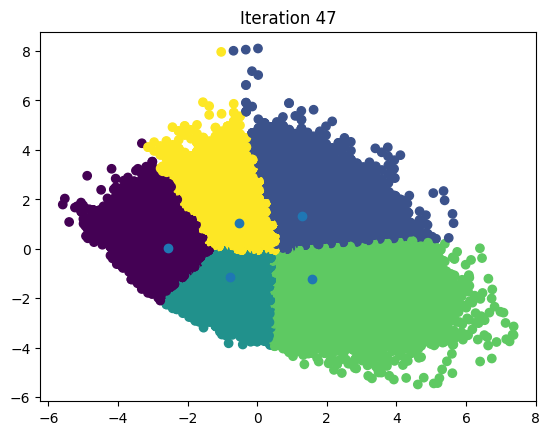

In [20]:
max_iterations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1

In [21]:
centroids

,0,1,2,3,4
overall,3.445086,5.791072,4.980255,6.793444,4.806561
potential,4.866409,5.467674,6.374250,7.076482,4.799990
wage_eur,1.015734,1.129522,1.055296,1.465367,1.043560
value_eur,1.008552,1.054707,1.047050,1.358423,1.024587
age,2.126928,5.404871,2.393270,3.681308,3.967932


In [22]:
players[labels ==4][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
4947,Z. Bytyqi,70,70,12000.0,1700000.0,26
5116,M. Pantović,70,70,7000.0,1700000.0,26
5127,N. Sarenren Bazee,70,70,5000.0,1700000.0,26
5131,G. Hein,70,70,5000.0,1700000.0,26
5151,L. Blessing,70,70,5000.0,1700000.0,26
...,...,...,...,...,...,...
179894,K. Al Shammari,48,48,2000.0,30000.0,28
179895,M. Al Khaltham,48,48,2000.0,25000.0,29
179959,K. Al Dossary,47,47,2000.0,30000.0,28
179960,S. Manzoni,47,47,2000.0,35000.0,29


In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
centroids = kmeans.cluster_centers_

In [26]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.286950,6.554974,5.394936
potential,5.569276,6.989018,5.137073
wage_eur,1.029174,1.430501,1.088973
value_eur,1.023287,1.324840,1.037474
age,2.476203,3.637864,4.970836
